In [1]:
# Import the dependencies

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(-90.000, 90.000, size=2000)

lngs = np.random.uniform(-180.000, 180.000, size=2000)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-73.6977917039861 -179.9980940091666
20.676647140033523 142.01143664261753
6.159491997512674 114.06011874611778
-7.62112043602005 -123.59384801942437
-57.19292223555414 -137.51214227146562
37.43044233657615 57.62683400772215
-49.89078526168861 -90.7846277758544
7.76191306043134 -124.32729384658717
86.81660583405784 -21.360895592643374
-55.23101375976636 82.50284473841168
-5.697944468012153 172.9745621448584
70.46530391583732 96.96901010297864
-37.75058398980558 33.407831292210545
-30.611972387764325 109.52010308796451
-51.080130843655596 63.3894117040405
-44.74995839212949 36.205795039407576
17.873682951490707 -111.37927181633033
0.24774222081241248 -29.38595709450874
74.4047941087737 -16.349178596244116
5.277916011142622 -148.72987373310903
-3.014314955844867 101.87235425591541
10.393659982844682 161.0047936910072
-84.9974695412923 134.95982399501446
-55.66108180318808 12.032714702825444
54.95229132464553 68.98957029764972
-37.174320805255746 23.142198945470142
-69.10776694758388 -51.

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)

# Print the city count to confirm sufficient count.

len(cities)

770

In [7]:
# import environment variable containing weather data api key.

import os
from dotenv import load_dotenv
load_dotenv()

weather_api_key = os.getenv('weather_api_key')

In [8]:
# Import requests library

import requests

# build url

url = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}"

In [9]:
# Import the time library and the datetime module form the datetime library

import time

from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.

record_count = 1

set_count = 1

# Loop through all the cities in our list.

for i, city in enumerate(cities):
    
    # Group cities in set of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = f"{url}&q={city.replace(' ','')}"
    
    # Log the URL, record and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
    # Run an API request for each of the cities

    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City" : city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city.
    
    except:
        
        print("City not found. Skipping...")
        
        pass

# Indicate that Data loading is complete.

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
                                                    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | shimoda
Processing Record 3 of Set 1 | labuan
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | bojnurd
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | cabo san lucas
City not found. Skipping...
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | lolua
City not found. Skipping...
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 14 of Set 1 | geraldton
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | east london
City not found. Skipping...
Processing Record 17 of Set 1 | touros
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | curup
Processing Record 20 of Set 

In [12]:
len(city_data)

576

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,78.96,78,40,9.22,TO,2022-07-20 22:39:13
1,Shimoda,34.6667,138.9500,81.25,79,95,8.46,JP,2022-07-20 22:44:06
2,Labuan,5.2767,115.2417,79.16,94,20,0.00,MY,2022-07-20 22:44:07
3,Atuona,-9.8000,-139.0333,77.56,75,7,14.74,PF,2022-07-20 22:40:08
4,Rikitea,-23.1203,-134.9692,73.47,74,0,3.60,PF,2022-07-20 22:44:08
5,Bojnurd,37.4747,57.3290,75.15,64,0,2.30,IR,2022-07-20 22:44:08
6,Castro,-24.7911,-50.0119,57.81,92,1,4.38,BR,2022-07-20 22:40:58
7,Busselton,-33.6500,115.3333,55.72,94,100,8.95,AU,2022-07-20 22:37:44
8,Khatanga,71.9667,102.5000,46.65,66,100,20.33,RU,2022-07-20 22:40:39
9,Geraldton,-28.7667,114.6000,68.41,94,100,16.11,AU,2022-07-20 22:36:32


In [14]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp",
                            "Humidity", "Cloudiness", "Wind Speed"]]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-07-20 22:39:13,-21.2000,-175.2000,78.96,78,40,9.22
1,Shimoda,JP,2022-07-20 22:44:06,34.6667,138.9500,81.25,79,95,8.46
2,Labuan,MY,2022-07-20 22:44:07,5.2767,115.2417,79.16,94,20,0.00
3,Atuona,PF,2022-07-20 22:40:08,-9.8000,-139.0333,77.56,75,7,14.74
4,Rikitea,PF,2022-07-20 22:44:08,-23.1203,-134.9692,73.47,74,0,3.60
5,Bojnurd,IR,2022-07-20 22:44:08,37.4747,57.3290,75.15,64,0,2.30
6,Castro,BR,2022-07-20 22:40:58,-24.7911,-50.0119,57.81,92,1,4.38
7,Busselton,AU,2022-07-20 22:37:44,-33.6500,115.3333,55.72,94,100,8.95
8,Khatanga,RU,2022-07-20 22:40:39,71.9667,102.5000,46.65,66,100,20.33
9,Geraldton,AU,2022-07-20 22:36:32,-28.7667,114.6000,68.41,94,100,16.11


In [19]:
# Create the output file (CSV)

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

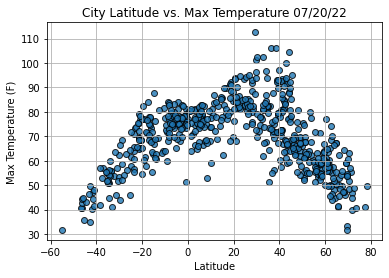

In [21]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            max_temps,
            edgecolor='k', linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title("City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

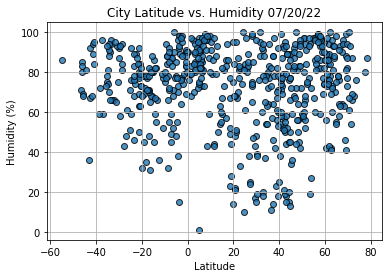

In [22]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            humidity,
            edgecolor='k', linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title("City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

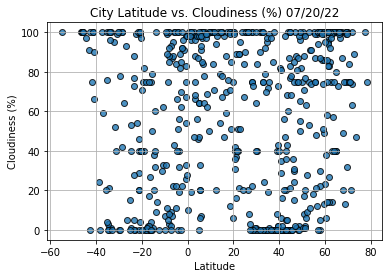

In [23]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            cloudiness,
            edgecolor='k', linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title("City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

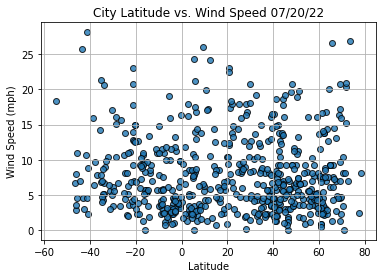

In [24]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            wind_speed,
            edgecolor='k', linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title("City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

In [25]:
# Import linregress

from scipy.stats import linregress


# Create a function to perform linear regression on the weather data
# and plot the regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    
    # Calculate the regression line "y_values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='r')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

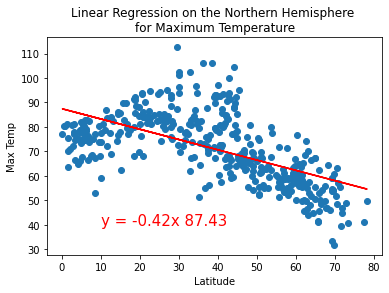

In [35]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 
                       'Max Temp',(10,40))

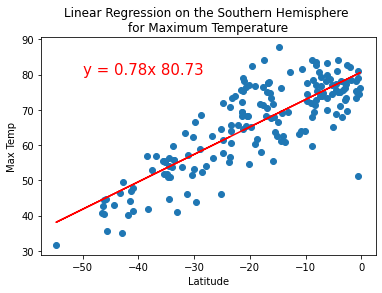

In [37]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 
                       'Max Temp',(-50,80))

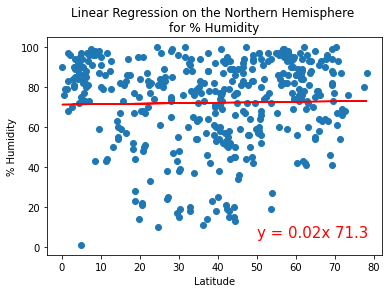

In [42]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', 
                       '% Humidity',(50,5))

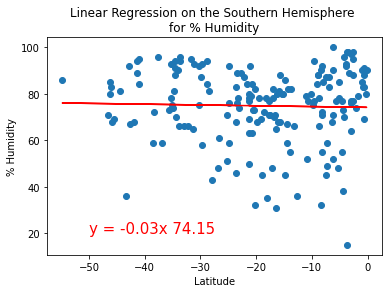

In [45]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', 
                       '% Humidity',(-50,20))

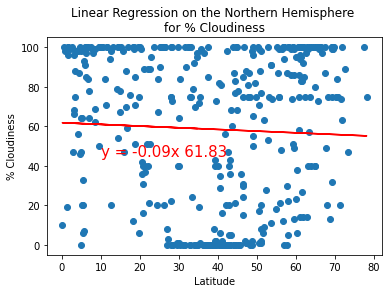

In [53]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', 
                       '% Cloudiness',(10,45))

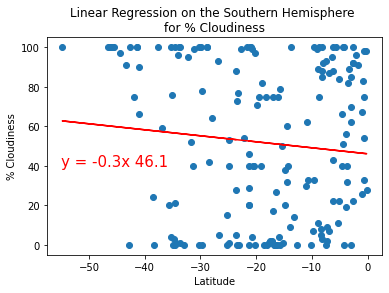

In [56]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', 
                       '% Cloudiness',(-55,40))

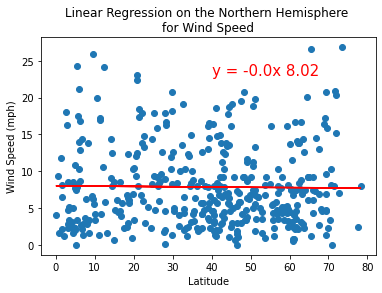

In [66]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 
                       'Wind Speed (mph)',(40,23))

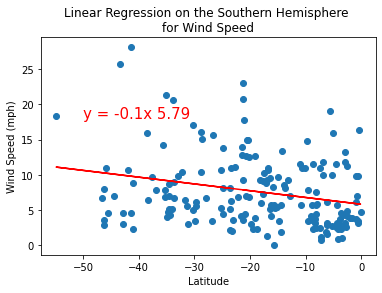

In [70]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 
                       'Wind Speed (mph)',(-50,18))